In [6]:
using Plots
using FilePathsBase
using Statistics
using LaTeXStrings

In [7]:
function read_data(file_path::String; header=1, delimiter=r"\s+")
    # r"\s+" は 1回以上の空白文字（スペース、タブ、改行など）を意味する正規表現
    # ファイルを読み込む
    lines = readlines(file_path)
    
    println(lines[header])  # ヘッダーを表示

    # データを格納する配列を初期化
    # T(MeV) mu(MeV) M_u(MeV) M_d(MeV) M_s(MeV) phi_u/L^3 phi_d/L^3 phi_s/L^3
    T = []
    mu = []
    M_u = []
    M_d = []
    M_s = []

    # 各行からデータを抽出し、配列に追加
    for line in lines[header+1:end]
        # 指定された区切り文字で行を分割
        values = parse.(Float64, split(line, delimiter))
        push!(T, values[1])
        push!(mu, values[2])
        push!(M_u, values[3])
        push!(M_d, values[4])
        push!(M_s, values[5])
    end
    
    # 結果を返す
    return T, mu, M_u, M_d, M_s
end

read_data (generic function with 1 method)

T(MeV)		mu(MeV)		M_u(MeV)		M_d(MeV)		M_s(MeV)		phi_u/L^3		phi_d/L^3		phi_s/L^3


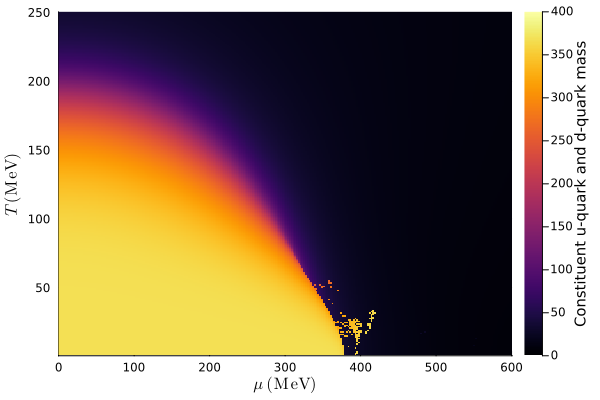

In [104]:
T, mu, M_u, M_d, M_s = read_data("src/data_three_flavor_njl_GL2=1_835_KL5=12_36.txt")
T_u = sort(unique(T))
mu_u = sort(unique(mu))
M_u_mat = reshape(M_u, sqrt(length(M_u))|>Int, sqrt(length(M_u))|>Int) |> permutedims  
# Juliaは column-major order !
max_value = maximum(M_u[.!isnan.(M_u)])
heatmap(mu_u, T_u, M_u_mat;
    clim=(0.0,round(max_value, digits=-2)),
    ylabel=L"T\ (\mathrm{MeV})",
    xlabel=L"\mu\ (\mathrm{MeV})",
     colorbar_title="Constituent u-quark and d-quark mass",
)
# savefig("fig/up_down_qurk_condensate.png")

T(MeV)		mu(MeV)		M_u(MeV)		M_d(MeV)		M_s(MeV)		phi_u/L^3		phi_d/L^3		phi_s/L^3


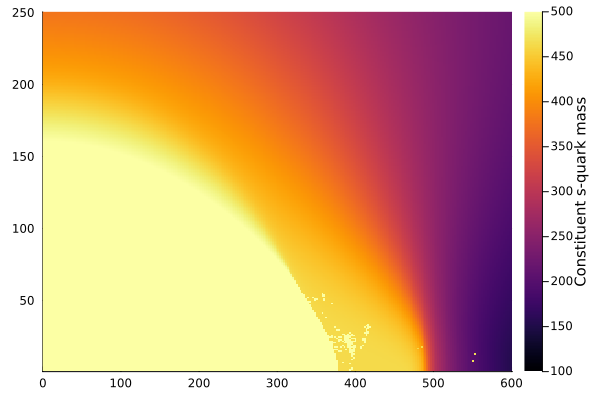

In [105]:
T, mu, M_u, M_d, M_s = read_data("src/data_three_flavor_njl_GL2=1_835_KL5=12_36.txt")
T_u = sort(unique(T))
mu_u = sort(unique(mu))
M_s_mat = reshape(M_s, sqrt(length(M_s))|>Int, sqrt(length(M_s))|>Int) |> permutedims  
# Juliaは column-major order !
max_value = maximum(M_s[.!isnan.(M_s)])
min_value = minimum(M_s[.!isnan.(M_s)])
heatmap(mu_u, T_u, M_s_mat;
    clim=(floor(min_value, digits=-2),round(max_value, digits=-2)),
    colorbar_title="Constituent s-quark mass",
)
# savefig("fig/strange_qurk_condensate.png")

In [93]:
T, mu, M_u, M_d, M_s = read_data("src/data_three_flavor_njl_GL2=1_835_KL5=9_29.txt")
T_u = sort(unique(T))
mu_u = sort(unique(mu))
M_u_mat = reshape(M_u, sqrt(length(M_u))|>Int, sqrt(length(M_u))|>Int) |> permutedims  
# Juliaは column-major order !
max_value = maximum(M_u[.!isnan.(M_u)])
heatmap(mu_u, T_u, M_u_mat;
    clim=(0.0,round(max_value, digits=-2)),
)

T(MeV)		mu(MeV)		M_u(MeV)		M_d(MeV)		M_s(MeV)		phi_u/L^3		phi_d/L^3		phi_s/L^3


"/Users/mnmgchjsk/JupyterLab/ThreeFlavor_NJL_model/fig/up_down_qurk_condensate.png"

In [94]:
T, mu, M_u, M_d, M_s = read_data("src/data_three_flavor_njl_GL2=1_835_KL5=9_29.txt")

T_u = sort(unique(T))
mu_u = sort(unique(mu))
M_s_mat = reshape(M_s, sqrt(length(M_s))|>Int, sqrt(length(M_s))|>Int) |> permutedims  
# Juliaは column-major order !
max_value = maximum(M_s[.!isnan.(M_s)])
min_value = minimum(M_s[.!isnan.(M_s)])
heatmap(mu_u, T_u, M_s_mat;
    clim=(floor(min_value, digits=-2),round(max_value, digits=-2)),
)

T(MeV)		mu(MeV)		M_u(MeV)		M_d(MeV)		M_s(MeV)		phi_u/L^3		phi_d/L^3		phi_s/L^3


"/Users/mnmgchjsk/JupyterLab/ThreeFlavor_NJL_model/fig/strange_qurk_condensate.png"

T(MeV)		mu(MeV)		M_u(MeV)		M_d(MeV)		M_s(MeV)		phi_u/L^3		phi_d/L^3		phi_s/L^3
352.0
469.607112
63.953079


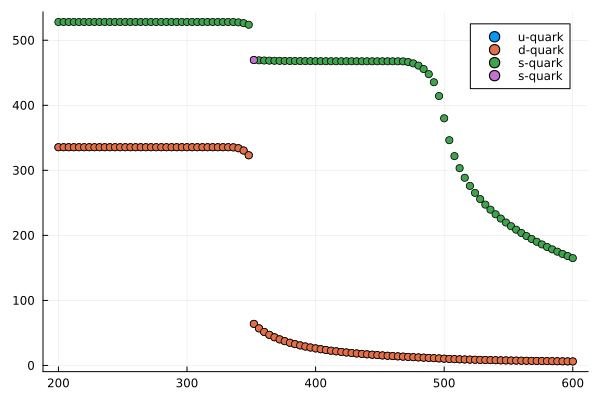

In [4]:
T, mu, M_u, M_d, M_s = read_data("src/data_three_flavor_njl_GL2=1_835_KL5=9_29.txt")
plt = scatter(mu, M_u;
    label="u-quark",
)
scatter!(plt, mu, M_d;
    label="d-quark",
)
scatter!(plt, mu, M_s;
    label="s-quark",
)
point = 39
scatter!(plt, mu[point:point], M_s[point:point];
    label="s-quark",
)
println(mu[point])
println(M_s[point])
println(M_u[point])
display(plt)

In [92]:
16*16*16*16

65536